In [1]:
!python --version

Python 3.9.13


In [73]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import pickle
import json

In [3]:
df = pd.read_csv('laptops.csv')

In [4]:
df.head(3)

Unnamed: 0                                           img_link  \
0           0  https://rukminim1.flixcart.com/image/312/312/x...   
1           1  https://rukminim1.flixcart.com/image/312/312/x...   
2           2  https://rukminim1.flixcart.com/image/312/312/l...   

                                   name  price_rs  \
0         Lenovo Intel Core i5 11th Gen     62990   
1        Lenovo V15 G2 Core i3 11th Gen     37500   
2  ASUS TUF Gaming F15 Core i5 10th Gen     49990   

                            processor             ram  \
0  Intel Core i5 Processor (11th Gen)  16 GB DDR4 RAM   
1  Intel Core i3 Processor (11th Gen)   8 GB DDR4 RAM   
2  Intel Core i5 Processor (10th Gen)   8 GB DDR4 RAM   

                                   os              storage  display_inch  \
0         Windows 11 Operating System           512 GB SSD          15.6   
1  64 bit Windows 11 Operating System  1 TB HDD|256 GB SSD          15.6   
2         Windows 11 Operating System           512 GB SSD          15.6   

   rating  no_of_ratings  no_of_reviews  
0     4.5           14.0            1.0  
1     4.4           53.0            3.0  
2     4.4         4733.0          463.0

In [5]:
df.drop(['Unnamed: 0','img_link'],axis = 1,inplace=True)

In [6]:
df.sample(2)

name  price_rs  \
730           ASUS Core i7 12th Gen    104405   
436  Lenovo Ryzen 7 Octa Core 5800H    218290   

                              processor             ram  \
730  Intel Core i7 Processor (12th Gen)  16 GB DDR5 RAM   
436     AMD Ryzen 7 Octa Core Processor  16 GB DDR5 RAM   

                              os   storage  display_inch  rating  \
730  Windows 11 Operating System  1 TB SSD          15.6     NaN   
436  Windows 11 Operating System  1 TB SSD          16.0     NaN   

     no_of_ratings  no_of_reviews  
730            NaN            NaN  
436            NaN            NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           984 non-null    object 
 1   price_rs       984 non-null    int64  
 2   processor      984 non-null    object 
 3   ram            984 non-null    object 
 4   os             984 non-null    object 
 5   storage        984 non-null    object 
 6   display_inch   984 non-null    float64
 7   rating         688 non-null    float64
 8   no_of_ratings  688 non-null    float64
 9   no_of_reviews  688 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 77.0+ KB


In [8]:
df.isna().sum()

name               0
price_rs           0
processor          0
ram                0
os                 0
storage            0
display_inch       0
rating           296
no_of_ratings    296
no_of_reviews    296
dtype: int64

In [9]:
df['rating'].fillna(df['rating'].mean(),inplace=True)
df['no_of_ratings'].fillna(df['no_of_ratings'].mean(),inplace=True)
df['no_of_reviews'].fillna(df['no_of_reviews'].mean(),inplace=True)

In [10]:
df.isna().sum()

name             0
price_rs         0
processor        0
ram              0
os               0
storage          0
display_inch     0
rating           0
no_of_ratings    0
no_of_reviews    0
dtype: int64

In [11]:
df['name'].value_counts()

Lenovo Intel Core i5 11th Gen                   43
Lenovo V15 G2 Core i3 11th Gen                  28
DELL Vostro Ryzen 3 Quad Core 5425U             27
Lenovo IdeaPad 3 Core i3 11th Gen               16
Lenovo Intel Core i3 11th Gen                   16
                                                ..
DELL G15 Ryzen 5 Hexa Core AMD R5                1
ASUS ASUS TUF Dash F15 Core i7 12th Gen          1
ASUS VivoBook Ultra Ryzen 7 Octa Core AMD R7     1
DELL Insprion 3511 Core i3 11th Gen              1
ASUS Celeron Dual Core 10th Gen                  1
Name: name, Length: 506, dtype: int64

In [12]:
df['name']=df['name'].apply(lambda x:" ".join(x.split()[0:1]))

In [13]:
df.sample(5)

name  price_rs                           processor             ram  \
906    ASUS    189990     AMD Ryzen 9 Octa Core Processor  16 GB DDR5 RAM   
151  Lenovo     52890  Intel Core i5 Processor (11th Gen)  16 GB DDR4 RAM   
706      HP     81600     AMD Ryzen 7 Octa Core Processor  16 GB DDR4 RAM   
139    DELL     42490  Intel Core i3 Processor (11th Gen)   8 GB DDR4 RAM   
735      HP    160180     AMD Ryzen 9 Octa Core Processor  32 GB DDR5 RAM   

                                     os              storage  display_inch  \
906  64 bit Windows 11 Operating System             1 TB SSD          15.6   
151         Windows 11 Operating System           512 GB SSD          15.6   
706  64 bit Windows 11 Operating System             1 TB SSD          13.3   
139         Windows 11 Operating System  1 TB HDD|256 GB SSD          15.6   
735  64 bit Windows 11 Operating System             1 TB SSD          16.1   

       rating  no_of_ratings  no_of_reviews  
906  4.284884      718.09157      83.898256  
151  4.500000       14.00000       1.000000  
706  4.300000        8.00000       0.000000  
139  4.200000      440.00000      40.000000  
735  4.284884      718.09157      83.898256

<AxesSubplot:>

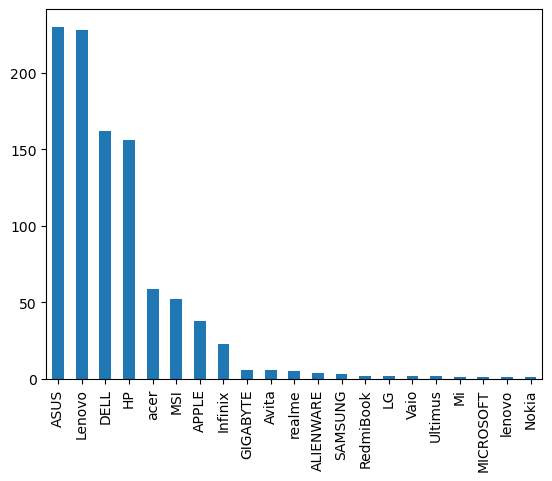

In [14]:
df['name'].value_counts().plot(kind='bar')

In [15]:
df['processor'].value_counts()

Intel Core i3 Processor (11th Gen)              131
Intel Core i5 Processor (11th Gen)              129
Intel Core i5 Processor (12th Gen)              101
AMD Ryzen 5 Hexa Core Processor                  93
AMD Ryzen 7 Octa Core Processor                  83
Intel Core i7 Processor (12th Gen)               65
AMD Ryzen 3 Quad Core Processor                  36
Intel Core i5 Processor (10th Gen)               31
Intel Core i3 Processor (10th Gen)               30
Intel Core i7 Processor (10th Gen)               26
Intel Core i7 Processor (11th Gen)               26
Intel Celeron Dual Core Processor                23
AMD Ryzen 9 Octa Core Processor                  20
AMD Ryzen 3 Dual Core Processor                  20
Intel Core i5 Processor (8th Gen)                16
Apple M1 Processor                               14
Apple M2 Processor                               13
Intel Core i9 Processor (12th Gen)               13
Intel Core i3 Processor (12th Gen)               12
AMD Ryzen 5 

In [16]:
df['processor']=df['processor'].apply(lambda x:" ".join(x.split()[0:3]))

In [17]:
df.sample(5)

name  price_rs           processor               ram  \
900  Lenovo     52490       Intel Core i5     8 GB DDR3 RAM   
676    ASUS     50990       Intel Core i5     8 GB DDR4 RAM   
815    ASUS     85990         AMD Ryzen 7    16 GB DDR4 RAM   
211    ASUS     89990       Intel Core i5  16 GB LPDDR5 RAM   
842    ASUS     22990  Intel Celeron Dual   4 GB LPDDR4 RAM   

                                     os     storage  display_inch    rating  \
900   64 bit Windows 8 Operating System    1 TB HDD          15.6  3.800000   
676         Windows 11 Operating System  512 GB SSD          15.6  4.284884   
815  64 bit Windows 10 Operating System  512 GB SSD          17.3  4.500000   
211  64 bit Windows 11 Operating System  512 GB SSD          15.6  4.400000   
842             Chrome Operating System  512 GB SSD          11.6  4.000000   

     no_of_ratings  no_of_reviews  
900       78.00000      17.000000  
676      718.09157      83.898256  
815     1468.00000     194.000000  
211       80.00000      12.000000  
842     1853.00000     287.000000

<AxesSubplot:>

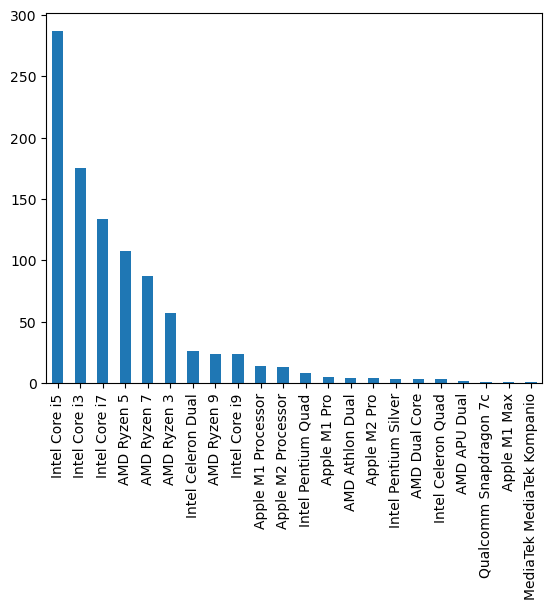

In [18]:
df['processor'].value_counts().plot(kind='bar')

In [19]:
def fetch_processor(new):
    if new == 'Intel Core i7' or new == 'Intel Core i5' or new == 'Intel Core i3' or new == 'Intel Core i9':
        return new
    else:
        if new.split()[0]=='Intel':
            return 'other Intel processor'
        else:
            return 'AMD processor'

In [20]:
df['processor']=df['processor'].apply(fetch_processor)

In [21]:
df.sample(3)

name  price_rs      processor            ram  \
29   ASUS     49990  AMD processor  8 GB DDR4 RAM   
728  acer     67990  AMD processor  8 GB DDR4 RAM   
93   ASUS     51990  Intel Core i5  8 GB DDR4 RAM   

                                     os              storage  display_inch  \
29   64 bit Windows 11 Operating System  1 TB HDD|256 GB SSD          15.6   
728  64 bit Windows 11 Operating System           512 GB SSD          15.6   
93          Windows 11 Operating System           512 GB SSD          15.6   

     rating  no_of_ratings  no_of_reviews  
29      4.4         1233.0          149.0  
728     4.3          222.0           25.0  
93      4.3          146.0           14.0

<AxesSubplot:>

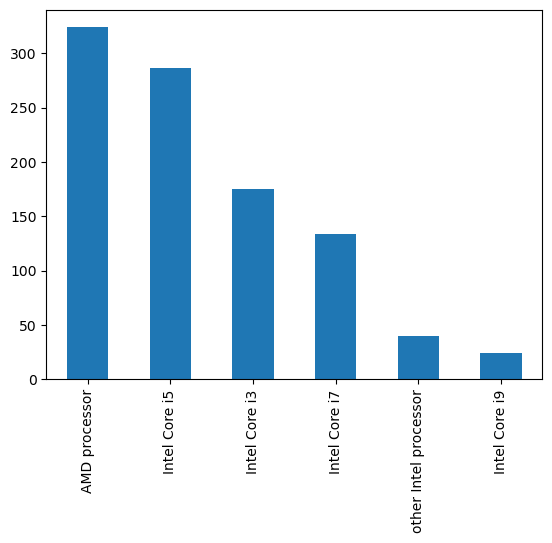

In [22]:
df['processor'].value_counts().plot(kind='bar')

In [23]:
df['ram'].value_counts()

8 GB DDR4 RAM               463
16 GB DDR4 RAM              235
16 GB DDR5 RAM               72
4 GB DDR4 RAM                45
8 GB LPDDR4X RAM             23
16 GB LPDDR5 RAM             22
32 GB DDR5 RAM               21
16 GB LPDDR4X RAM            18
4 GB LPDDR4 RAM              14
16 GB Unified Memory RAM     13
8 GB DDR5 RAM                12
8 GB Unified Memory RAM       9
32 GB DDR4 RAM                7
8 GB DDR3 RAM                 7
32 GB LPDDR5 RAM              5
4 GB LPDDR4X RAM              5
16 GB LPDDR3 RAM              5
8 GB LPDDR3 RAM               4
32 GB Unified Memory RAM      1
16 GB LPDDR4 RAM              1
32 GB LPDDR4X RAM             1
16 GB DDR3 RAM                1
Name: ram, dtype: int64

In [24]:
df['ram']=df['ram'].apply(lambda x:" ".join(x.split()[0:2]))

In [25]:
df.sample(3)

name  price_rs      processor    ram                                  os  \
968    HP     76990  Intel Core i5  16 GB         Windows 11 Operating System   
840   MSI     59990  Intel Core i5   8 GB  64 bit Windows 10 Operating System   
848  DELL     67990  AMD processor  16 GB         Windows 11 Operating System   

        storage  display_inch    rating  no_of_ratings  no_of_reviews  
968  512 GB SSD          14.0  4.284884      718.09157      83.898256  
840  512 GB SSD          15.6  4.500000     1197.00000     151.000000  
848  512 GB SSD          16.0  4.284884      718.09157      83.898256

<AxesSubplot:>

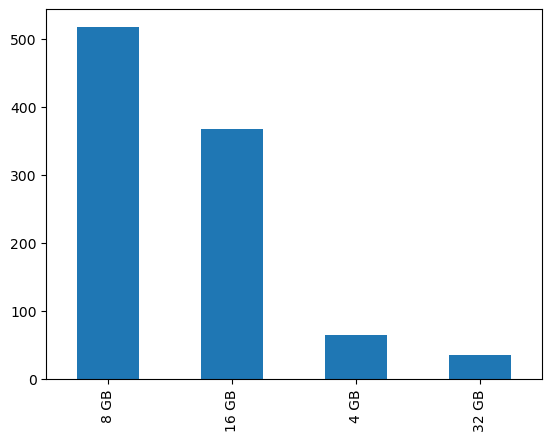

In [26]:
df['ram'].value_counts().plot(kind='bar')

In [27]:
df['os'].value_counts()

64 bit Windows 11 Operating System    527
64 bit Windows 10 Operating System    195
Windows 11 Operating System           183
Mac OS Operating System                38
Windows 10 Operating System            16
Chrome Operating System                 8
DOS Operating System                    6
64 bit Chrome Operating System          6
32 bit Windows 11 Operating System      3
64 bit DOS Operating System             1
64 bit Windows 8 Operating System       1
Name: os, dtype: int64

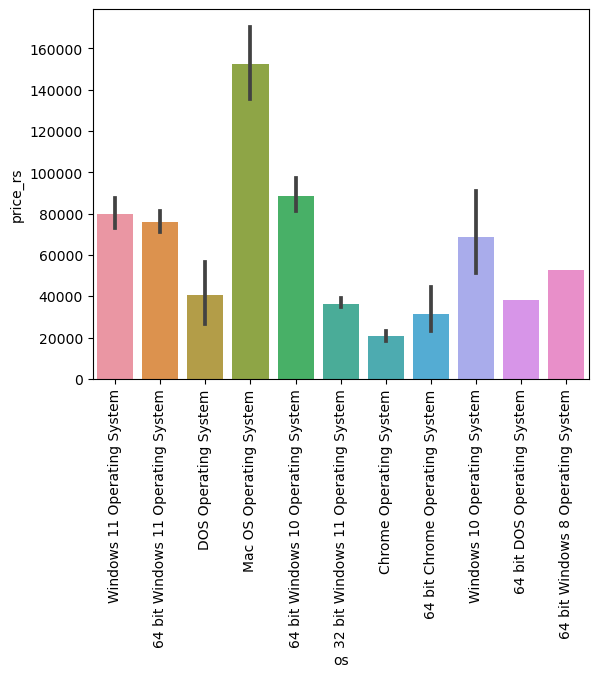

In [28]:
sns.barplot(x=df['os'],y=df['price_rs'])
plt.xticks(rotation='vertical')
plt.show()

In [29]:
def cat_os(test):
    if test == 'Windows 11 Operating System' or test == 'Windows 10 Operating System' or test == '64 bit Windows 11 Operating System'or test=='64 bit Windows 10 Operating System'or test=='64 bit Windows 8 Operating System':
        return 'Windows'
    elif test== 'Mac OS Operating System':
        return 'Mac'
    else:
        return 'DOS Operating/Chrome Operating/others'

In [30]:
df['os']=df['os'].apply(cat_os)

<AxesSubplot:>

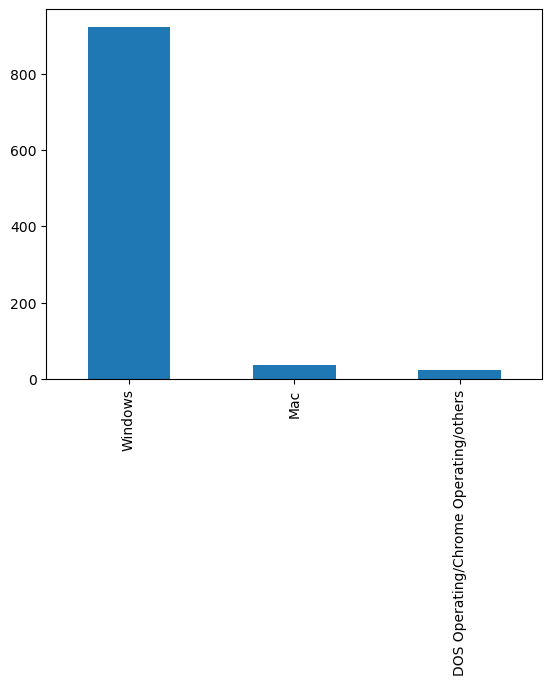

In [31]:
df['os'].value_counts().plot(kind='bar')

In [32]:
df.head(5)

name  price_rs      processor    ram  \
0  Lenovo     62990  Intel Core i5  16 GB   
1  Lenovo     37500  Intel Core i3   8 GB   
2    ASUS     49990  Intel Core i5   8 GB   
3    ASUS     33990  Intel Core i3   8 GB   
4  Lenovo     18990  AMD processor   4 GB   

                                      os              storage  display_inch  \
0                                Windows           512 GB SSD          15.6   
1                                Windows  1 TB HDD|256 GB SSD          15.6   
2                                Windows           512 GB SSD          15.6   
3                                Windows           512 GB SSD          15.6   
4  DOS Operating/Chrome Operating/others           256 GB SSD          14.0   

   rating  no_of_ratings  no_of_reviews  
0     4.5           14.0            1.0  
1     4.4           53.0            3.0  
2     4.4         4733.0          463.0  
3     4.3        10406.0         1040.0  
4     3.8           18.0            3.0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           984 non-null    object 
 1   price_rs       984 non-null    int64  
 2   processor      984 non-null    object 
 3   ram            984 non-null    object 
 4   os             984 non-null    object 
 5   storage        984 non-null    object 
 6   display_inch   984 non-null    float64
 7   rating         984 non-null    float64
 8   no_of_ratings  984 non-null    float64
 9   no_of_reviews  984 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 77.0+ KB


In [38]:
df['name'].value_counts().to_dict()

{'ASUS': 230,
 'Lenovo': 228,
 'DELL': 162,
 'HP': 156,
 'acer': 59,
 'MSI': 52,
 'APPLE': 38,
 'Infinix': 23,
 'GIGABYTE': 6,
 'Avita': 6,
 'realme': 5,
 'ALIENWARE': 4,
 'SAMSUNG': 3,
 'RedmiBook': 2,
 'LG': 2,
 'Vaio': 2,
 'Ultimus': 2,
 'Mi': 1,
 'MICROSOFT': 1,
 'lenovo': 1,
 'Nokia': 1}

In [48]:
df['name'].replace({'ASUS':1,
                 'Lenovo': 2,
                 'DELL': 3,
                 'HP': 4,
                 'acer': 5,
                 'MSI': 6,
                 'APPLE': 7,
                 'Infinix': 8,
                 'GIGABYTE': 9,
                 'Avita': 10,
                 'realme': 11,
                 'ALIENWARE': 12,
                 'SAMSUNG': 13,
                 'RedmiBook': 14,
                 'LG': 15,
                 'Vaio': 16,
                 'Ultimus': 17,
                 'Mi': 18,
                 'MICROSOFT': 19,
                 'lenovo': 20,
                 'Nokia': 21},inplace=True)

In [51]:
df['processor'].value_counts().to_dict()

{'AMD processor': 324,
 'Intel Core i5': 287,
 'Intel Core i3': 175,
 'Intel Core i7': 134,
 'other Intel processor': 40,
 'Intel Core i9': 24}

In [52]:
df['processor'].replace({'AMD processor': 1,
                         'Intel Core i5': 2,
                         'Intel Core i3': 3,
                         'Intel Core i7': 4,
                         'other Intel processor': 5,
                         'Intel Core i9': 6},inplace=True)

In [55]:
df['ram'].value_counts().to_dict()

{'8 GB': 518, '16 GB': 367, '4 GB': 64, '32 GB': 35}

In [56]:
df['ram'].replace({'8 GB': 1, '16 GB': 2, '4 GB': 3, '32 GB': 4},inplace=True)

In [62]:
df['os'].value_counts().to_dict()

{1: 922, 2: 38, 3: 24}

In [60]:
df['os'].replace({'Windows': 1, 'Mac': 2, 'DOS Operating/Chrome Operating/others': 3},inplace=True)

In [65]:
df['storage'].value_counts().to_dict()

{'512 GB SSD': 575,
 '1 TB SSD': 154,
 '256 GB SSD': 123,
 '1 TB HDD|256 GB SSD': 63,
 '1 TB HDD': 33,
 '2 TB SSD': 11,
 '128 GB SSD': 8,
 '1 TB HDD|512 GB SSD': 4,
 '512 GB HDD|512 GB SSD': 3,
 '1 TB HDD|128 GB SSD': 3,
 '256 GB HDD|256 GB SSD': 2,
 '4 TB SSD': 1,
 'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center': 1,
 'PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel?MSI Center?Silky Smooth Touchpad?Military-Grade Durability': 1,
 '2 TB HDD': 1,
 '256 GB HDD': 1}

In [67]:
df['storage'].replace({'512 GB SSD': 1,
                         '1 TB SSD': 2,
                         '256 GB SSD': 3,
                         '1 TB HDD|256 GB SSD': 4,
                         '1 TB HDD': 5,
                         '2 TB SSD': 6,
                         '128 GB SSD': 7,
                         '1 TB HDD|512 GB SSD': 8,
                         '512 GB HDD|512 GB SSD': 9,
                         '1 TB HDD|128 GB SSD': 10,
                         '256 GB HDD|256 GB SSD': 11,
                         '4 TB SSD': 12,
                         'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center': 13,
                         'PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel?MSI Center?Silky Smooth Touchpad?Military-Grade Durability': 14,
                         '2 TB HDD': 15,
                         '256 GB HDD': 16},inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           984 non-null    int64  
 1   price_rs       984 non-null    int64  
 2   processor      984 non-null    int64  
 3   ram            984 non-null    int64  
 4   os             984 non-null    int64  
 5   storage        984 non-null    int64  
 6   display_inch   984 non-null    float64
 7   rating         984 non-null    float64
 8   no_of_ratings  984 non-null    float64
 9   no_of_reviews  984 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 77.0 KB


In [69]:
df

name  price_rs  processor  ram  os  storage  display_inch    rating  \
0       2     62990          2    2   1        1          15.6  4.500000   
1       2     37500          3    1   1        4          15.6  4.400000   
2       1     49990          2    1   1        1          15.6  4.400000   
3       1     33990          3    1   1        1          15.6  4.300000   
4       2     18990          1    3   3        3          14.0  3.800000   
..    ...       ...        ...  ...  ..      ...           ...       ...   
979     1     37990          3    1   1        5          15.6  4.000000   
980     4     22670          1    3   3        5          11.6  3.800000   
981     1     54990          1    1   1        1          14.0  4.500000   
982     3     40990          3    1   1        4          15.6  4.000000   
983     1     24540          5    3   1        3          14.0  4.284884   

     no_of_ratings  no_of_reviews  
0         14.00000       1.000000  
1         53.00000       3.000000  
2       4733.00000     463.000000  
3      10406.00000    1040.000000  
4         18.00000       3.000000  
..             ...            ...  
979     1907.00000     227.000000  
980     5991.00000     687.000000  
981       22.00000       5.000000  
982      801.00000     104.000000  
983      718.09157      83.898256  

[984 rows x 10 columns]

In [35]:
df.columns

Index(['name', 'price_rs', 'processor', 'ram', 'os', 'storage', 'display_inch',
       'rating', 'no_of_ratings', 'no_of_reviews'],
      dtype='object')

In [70]:
df.describe()

name       price_rs   processor         ram          os  \
count  984.000000     984.000000  984.000000  984.000000  984.000000   
mean     3.364837   80960.720528    2.340447    1.609756    1.087398   
std      2.643255   57421.220919    1.301439    0.762916    0.358708   
min      1.000000   15990.000000    1.000000    1.000000    1.000000   
25%      2.000000   42655.000000    1.000000    1.000000    1.000000   
50%      3.000000   62990.000000    2.000000    1.000000    1.000000   
75%      4.000000   94990.000000    3.000000    2.000000    1.000000   
max     21.000000  419990.000000    6.000000    4.000000    3.000000   

          storage  display_inch      rating  no_of_ratings  no_of_reviews  
count  984.000000    984.000000  984.000000      984.00000     984.000000  
mean     2.004065     15.148374    4.284884      718.09157      83.898256  
std      1.746376      1.332078    0.276077     1463.66797     176.892962  
min      1.000000     11.600000    1.600000        1.00000       0.000000  
25%      1.000000     14.000000    4.200000       37.00000       3.000000  
50%      1.000000     15.600000    4.284884      385.00000      39.500000  
75%      3.000000     15.600000    4.400000      718.09157      83.898256  
max     16.000000     35.000000    5.000000    15492.00000    2054.000000

<AxesSubplot:>

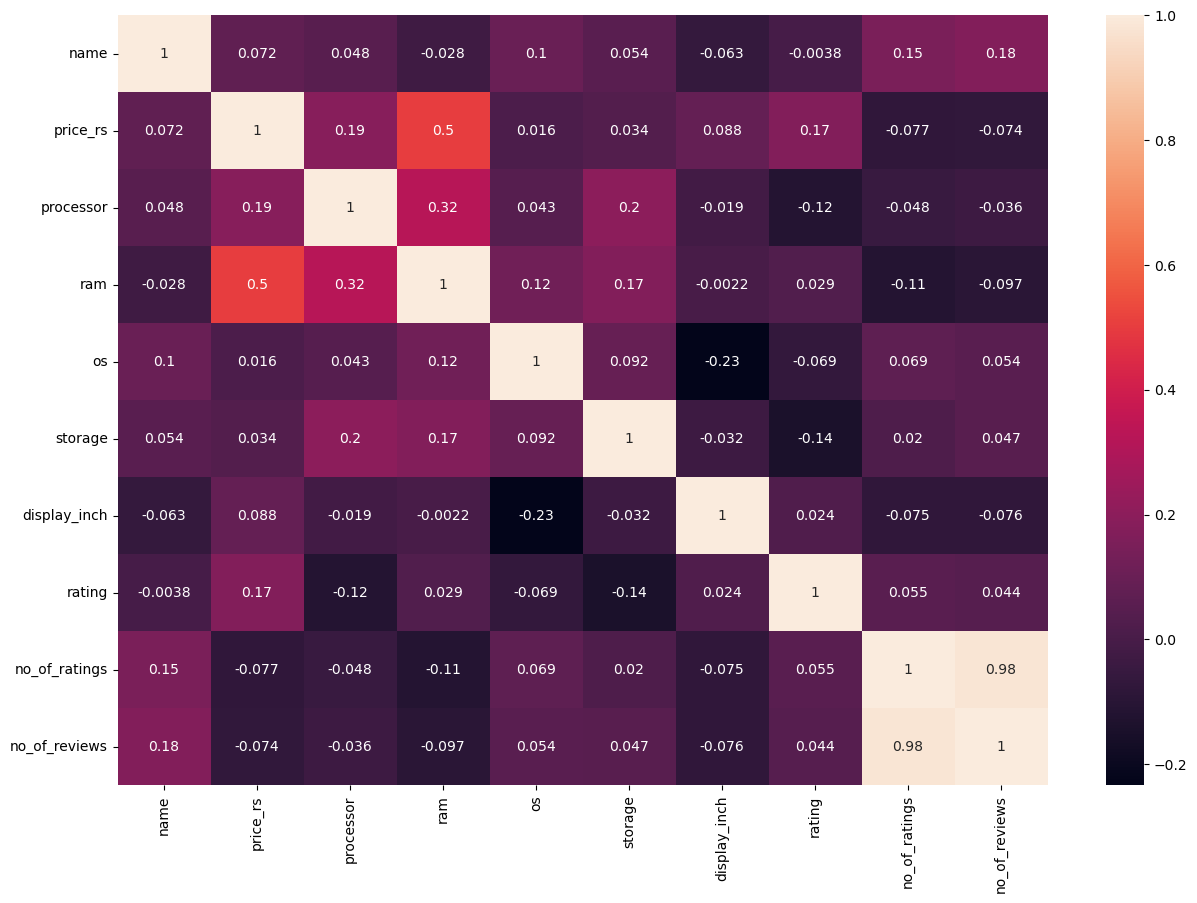

In [71]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),annot=True)

In [72]:
df.corr()['price_rs']

name             0.071590
price_rs         1.000000
processor        0.187687
ram              0.503412
os               0.015669
storage          0.033857
display_inch     0.088121
rating           0.173021
no_of_ratings   -0.076694
no_of_reviews   -0.074378
Name: price_rs, dtype: float64

In [74]:
x = df.drop('price_rs',axis=1)
y=df['price_rs']

In [77]:
norm_scaler = MinMaxScaler()
x_norm = norm_scaler.fit_transform(x) # min , max and apply on all x 
x_norm_df = pd.DataFrame(x_norm, columns = x.columns)
x_norm_df

name  processor       ram   os   storage  display_inch    rating  \
0    0.05        0.2  0.333333  0.0  0.000000      0.170940  0.852941   
1    0.05        0.4  0.000000  0.0  0.200000      0.170940  0.823529   
2    0.00        0.2  0.000000  0.0  0.000000      0.170940  0.823529   
3    0.00        0.4  0.000000  0.0  0.000000      0.170940  0.794118   
4    0.05        0.0  0.666667  1.0  0.133333      0.102564  0.647059   
..    ...        ...       ...  ...       ...           ...       ...   
979  0.00        0.4  0.000000  0.0  0.266667      0.170940  0.705882   
980  0.15        0.0  0.666667  1.0  0.266667      0.000000  0.647059   
981  0.00        0.0  0.000000  0.0  0.000000      0.102564  0.852941   
982  0.10        0.4  0.000000  0.0  0.200000      0.170940  0.705882   
983  0.00        0.8  0.666667  0.0  0.133333      0.102564  0.789672   

     no_of_ratings  no_of_reviews  
0         0.000839       0.000487  
1         0.003357       0.001461  
2         0.305468       0.225414  
3         0.671680       0.506329  
4         0.001097       0.001461  
..             ...            ...  
979       0.123039       0.110516  
980       0.386676       0.334469  
981       0.001356       0.002434  
982       0.051643       0.050633  
983       0.046291       0.040846  

[984 rows x 9 columns]

In [78]:
std_scaler = StandardScaler()
x_std = std_scaler.fit_transform(x) ## x_mean, x_std and apply to all x values 
x_std_df = pd.DataFrame(x_std, columns = x.columns)
x_std_df

name  processor       ram        os   storage  display_inch  \
0   -0.516610  -0.261726  0.511776 -0.243772 -0.575234      0.339211   
1   -0.516610   0.507045 -0.799650 -0.243772  1.143482      0.339211   
2   -0.895123  -0.261726 -0.799650 -0.243772 -0.575234      0.339211   
3   -0.895123   0.507045 -0.799650 -0.243772 -0.575234      0.339211   
4   -0.516610  -1.030497  1.823203  5.334635  0.570577     -0.862531   
..        ...        ...       ...       ...       ...           ...   
979 -0.895123   0.507045 -0.799650 -0.243772  1.716387      0.339211   
980  0.240418  -1.030497  1.823203  5.334635  1.716387     -2.665144   
981 -0.895123  -1.030497 -0.799650 -0.243772 -0.575234     -0.862531   
982 -0.138096   0.507045 -0.799650 -0.243772  1.143482      0.339211   
983 -0.895123   2.044587  1.823203 -0.243772  0.570577     -0.862531   

           rating  no_of_ratings  no_of_reviews  
0    7.795857e-01      -0.481291      -0.468873  
1    4.171837e-01      -0.454632      -0.457561  
2    4.171837e-01       2.744441       2.144204  
3    5.478170e-02       6.622291       5.407722  
4   -1.757228e+00      -0.478556      -0.457561  
..            ...            ...            ...  
979 -1.032424e+00       0.812693       0.809385  
980 -1.757228e+00       3.604362       3.411150  
981  7.795857e-01      -0.475822      -0.446249  
982 -1.032424e+00       0.056673       0.113696  
983  1.931266e-14       0.000000       0.000000  

[984 rows x 9 columns]

In [79]:
x_train,x_test, y_train,y_test = train_test_split(x_norm_df,y, test_size=0.3, random_state=5)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((688, 9), (296, 9), (688,), (296,))

In [80]:
x_norm_df.describe()

name   processor         ram          os     storage  \
count  984.000000  984.000000  984.000000  984.000000  984.000000   
mean     0.118242    0.268089    0.203252    0.043699    0.066938   
std      0.132163    0.260288    0.254305    0.179354    0.116425   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.050000    0.000000    0.000000    0.000000    0.000000   
50%      0.100000    0.200000    0.000000    0.000000    0.000000   
75%      0.150000    0.400000    0.333333    0.000000    0.133333   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       display_inch      rating  no_of_ratings  no_of_reviews  
count    984.000000  984.000000     984.000000     984.000000  
mean       0.151640    0.789672       0.046291       0.040846  
std        0.056926    0.081199       0.094485       0.086121  
min        0.000000    0.000000       0.000000       0.000000  
25%        0.102564    0.764706       0.002324       0.001461  
50%        0.170940    0.789672       0.024789       0.019231  
75%        0.170940    0.823529       0.046291       0.040846  
max        1.000000    1.000000       1.000000       1.000000

In [84]:
model=KNeighborsRegressor()
model.fit(x_train,y_train)

KNeighborsRegressor()

In [85]:
def model_eval(model,input_data, output):
    y_pred = model.predict(input_data)


    mse = mean_squared_error(output,y_pred)
    print(f"MSE = {mse}")
    print(f"RMSE = {np.sqrt(mse)}")
    
    mae = mean_absolute_error(output,y_pred)
    print(f"MAE = {mae}")
    
    r2 = r2_score(output,y_pred)
    print(f"R-Squared = {r2}")
    
    return "Success"

In [86]:
model_eval(model,x_test,y_test)

MSE = 1267778688.2055407
RMSE = 35605.879966734996
MAE = 20446.457432432435
R-Squared = 0.7052988053425373


'Success'

In [87]:
model_eval(model,x_train,y_train)

MSE = 463384682.21424425
RMSE = 21526.37178472592
MAE = 12423.593895348837
R-Squared = 0.8364929471109002


'Success'

In [ ]:
## Bias - Variance Tradeoff
# Bias >> high Bias 
# Variance >> high Varaiance 

# Underfit model 

# hyperparameter tuning

In [88]:
hyp_model = KNeighborsRegressor(n_neighbors=5)

hyp = {
    "n_neighbors":np.arange(3,10),
    "p":[1,2]
}

gscv = GridSearchCV(hyp_model,hyp)
gscv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([3, 4, 5, 6, 7, 8, 9]),
                         'p': [1, 2]})

In [89]:
gscv.best_params_

{'n_neighbors': 5, 'p': 1}

In [90]:
hyp_model = gscv.best_estimator_
hyp_model.fit(x_train,y_train)
# Testing data eval 
print(f"######## TESTING DATA EVALUATION ########")
model_eval(hyp_model,x_test,y_test)
print()
print(f"######## TRAINING DATA EVALUATION ########")
# Training Data eval 
model_eval(hyp_model,x_train, y_train)

######## TESTING DATA EVALUATION ########
MSE = 1114662140.5033784
RMSE = 33386.55628398021
MAE = 19557.538513513515
R-Squared = 0.7408914761686444

######## TRAINING DATA EVALUATION ########
MSE = 405325083.9097675
RMSE = 20132.686952062995
MAE = 11478.342441860465
R-Squared = 0.8569794978646449


'Success'

In [91]:
x_train,x_test, y_train,y_test = train_test_split(x_norm_df,y, test_size=0.2, random_state=42)
test_model = KNeighborsRegressor()
test_model.fit(x_train,y_train)
# Testing data eval 
print(f"######## TESTING DATA EVALUATION ########")
model_eval(test_model,x_test,y_test)
print()
print(f"######## TRAINING DATA EVALUATION ########")
# Training Data eval 
model_eval(test_model,x_train, y_train)

######## TESTING DATA EVALUATION ########
MSE = 725983760.1983757
RMSE = 26944.085811145564
MAE = 16637.90152284264
R-Squared = 0.8238040229188759

######## TRAINING DATA EVALUATION ########
MSE = 585940205.1642693
RMSE = 24206.201791364736
MAE = 13454.277255400253
R-Squared = 0.8089697541811812


'Success'

In [92]:
with open('new_model.pkl','wb') as file: 
    pickle.dump(hyp_model,file)

In [95]:
project_data = {"column_names":x.columns.tolist(),
                 "NAME":  {'ASUS': 1,'Lenovo': 2,'DELL': 3,'HP': 4,'acer': 5,'MSI': 6,'APPLE': 7,
                         'Infinix': 8,'GIGABYTE': 9,'Avita': 10,'realme': 11,'ALIENWARE': 12,
                         'SAMSUNG': 13,'RedmiBook': 14,'LG': 15,'Vaio': 16,'Ultimus': 17,'Mi': 18,
                         'MICROSOFT': 19,'lenovo': 20,'Nokia': 21,},
                 "PROCESSOR"  :{'AMD processor': 1,'Intel Core i5': 2,'Intel Core i3': 3,
                              'Intel Core i7': 4,'other Intel processor': 5,'Intel Core i9': 6},
                 "RAM"        :{'8': 8, '16': 16, '4': 4, '32': 32},
                 "OS"       :{'Windows': 1, 'Mac': 2, 'DOS Operating/Chrome Operating/others': 3},
                 "storage"  :{'512 GB SSD': 1,'1 TB SSD': 2,'256 GB SSD': 3,
                              '1 TB HDD|256 GB SSD': 4,'1 TB HDD': 5,'2 TB SSD': 6,'128 GB SSD': 7,
                              '1 TB HDD|512 GB SSD': 8,'512 GB HDD|512 GB SSD': 9,'1 TB HDD|128 GB SSD': 10,
                              '256 GB HDD|256 GB SSD': 11,'4 TB SSD': 12,
'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center': 13,
'PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel?MSI Center?Silky Smooth Touchpad?Military-Grade Durability': 14,
'2 TB HDD': 15,
'256 GB HDD': 16},
                }

with open('new_project_data.json','w') as file:
    json.dump(project_data,file)

In [98]:
scaler = MinMaxScaler()
arr = scaler.fit_transform(x)
x_scale = pd.DataFrame(arr, columns = x.columns)
x_scale

name  processor       ram   os   storage  display_inch    rating  \
0    0.05        0.2  0.333333  0.0  0.000000      0.170940  0.852941   
1    0.05        0.4  0.000000  0.0  0.200000      0.170940  0.823529   
2    0.00        0.2  0.000000  0.0  0.000000      0.170940  0.823529   
3    0.00        0.4  0.000000  0.0  0.000000      0.170940  0.794118   
4    0.05        0.0  0.666667  1.0  0.133333      0.102564  0.647059   
..    ...        ...       ...  ...       ...           ...       ...   
979  0.00        0.4  0.000000  0.0  0.266667      0.170940  0.705882   
980  0.15        0.0  0.666667  1.0  0.266667      0.000000  0.647059   
981  0.00        0.0  0.000000  0.0  0.000000      0.102564  0.852941   
982  0.10        0.4  0.000000  0.0  0.200000      0.170940  0.705882   
983  0.00        0.8  0.666667  0.0  0.133333      0.102564  0.789672   

     no_of_ratings  no_of_reviews  
0         0.000839       0.000487  
1         0.003357       0.001461  
2         0.305468       0.225414  
3         0.671680       0.506329  
4         0.001097       0.001461  
..             ...            ...  
979       0.123039       0.110516  
980       0.386676       0.334469  
981       0.001356       0.002434  
982       0.051643       0.050633  
983       0.046291       0.040846  

[984 rows x 9 columns]

In [99]:
with open('new_scale.pkl','wb') as file: 
    pickle.dump(scaler,file)